In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import io

In [3]:
df = pd.read_csv("FlightPriceData.csv")

In [4]:
df.head()

Unnamed: 0 FlightName DepartureTime     ArrivalTime     Source Destination  \
0           0   Air Asia         22:10  12:25\n+ 1 day  New Delhi      Mumbai   
1           1   Go First         07:00           09:10  New Delhi      Mumbai   
2           2   Go First         08:00           10:10  New Delhi      Mumbai   
3           3   Go First         22:30  00:40\n+ 1 day  New Delhi      Mumbai   
4           4   Go First         02:40           04:55  New Delhi      Mumbai   

  TImeTaken(hrs) TotalStops  Price  
0        14h 15m     1 Stop  5,953  
1         2h 10m   Non Stop  5,954  
2         2h 10m   Non Stop  5,954  
3         2h 10m   Non Stop  5,954  
4         2h 15m   Non Stop  5,954

In [5]:
df.shape

(2325, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2325 non-null   int64 
 1   FlightName      2325 non-null   object
 2   DepartureTime   2325 non-null   object
 3   ArrivalTime     2325 non-null   object
 4   Source          2325 non-null   object
 5   Destination     2325 non-null   object
 6   TImeTaken(hrs)  2325 non-null   object
 7   TotalStops      2325 non-null   object
 8   Price           2325 non-null   object
dtypes: int64(1), object(8)
memory usage: 163.6+ KB


In [7]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [8]:
##checking null values

In [9]:
df.isnull().sum()

FlightName        0
DepartureTime     0
ArrivalTime       0
Source            0
Destination       0
TImeTaken(hrs)    0
TotalStops        0
Price             0
dtype: int64

In [10]:
##no null values in data

In [11]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print("\n")

FlightName
['Air Asia' 'Go First' 'IndiGo' 'Air India' 'Vistara' 'SpiceJet' 'StarAir'
 'TruJet']


DepartureTime
['22:10' '07:00' '08:00' '22:30' '02:40' '14:20' '19:40' '21:00' '10:30'
 '15:00' '09:00' '21:20' '18:35' '21:50' '10:40' '23:15' '08:50' '18:55'
 '17:55' '21:25' '07:15' '08:10' '01:05' '10:45' '06:00' '09:30' '12:50'
 '15:30' '16:55' '19:50' '20:40' '21:40' '07:30' '10:20' '11:40' '17:45'
 '06:30' '12:00' '16:50' '20:20' '20:45' '12:55' '20:35' '13:50' '17:40'
 '14:45' '20:00' '11:20' '04:45' '21:10' '19:00' '13:20' '07:05' '13:40'
 '16:15' '18:30' '16:45' '14:30' '06:55' '10:15' '05:55' '08:45' '04:25'
 '05:15' '06:40' '13:15' '07:20' '11:00' '09:10' '17:10' '15:05' '11:30'
 '15:10' '17:05' '05:30' '18:00' '19:45' '11:10' '07:25' '06:05' '06:25'
 '22:15' '11:25' '09:45' '17:15' '18:50' '21:15' '10:55' '16:20' '11:50'
 '00:35' '14:40' '08:05' '16:05' '14:10' '12:05' '19:30' '19:05' '13:00'
 '22:00' '16:35' '15:20' '12:15' '14:05' '18:15' '17:00' '13:10' '20:05'
 '13:30' '1

In [12]:
##we have 8 different flights
##sources from where flight is departed are 7 and arrival cities are 10
##number of stops are upto 4

In [13]:
df.head()

FlightName DepartureTime     ArrivalTime     Source Destination  \
0   Air Asia         22:10  12:25\n+ 1 day  New Delhi      Mumbai   
1   Go First         07:00           09:10  New Delhi      Mumbai   
2   Go First         08:00           10:10  New Delhi      Mumbai   
3   Go First         22:30  00:40\n+ 1 day  New Delhi      Mumbai   
4   Go First         02:40           04:55  New Delhi      Mumbai   

  TImeTaken(hrs) TotalStops  Price  
0        14h 15m     1 Stop  5,953  
1         2h 10m   Non Stop  5,954  
2         2h 10m   Non Stop  5,954  
3         2h 10m   Non Stop  5,954  
4         2h 15m   Non Stop  5,954

In [14]:
duration = list(df["TImeTaken(hrs)"])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  
dur_seconds = []

for i in range(len(duration)) :
    dur_minutes.append(int(duration[i].split()[0][:-1])*60 + int(duration[i].split()[1][:-1]))
    dur_seconds.append(int(duration[i].split()[0][:-1])*60*60 + int(duration[i].split()[1][:-1])*60)
    
df["Duration_minutes"] = dur_minutes
df

df.drop(["TImeTaken(hrs)"], axis=1, inplace = True)

In [15]:
df.head()

FlightName DepartureTime     ArrivalTime     Source Destination TotalStops  \
0   Air Asia         22:10  12:25\n+ 1 day  New Delhi      Mumbai     1 Stop   
1   Go First         07:00           09:10  New Delhi      Mumbai   Non Stop   
2   Go First         08:00           10:10  New Delhi      Mumbai   Non Stop   
3   Go First         22:30  00:40\n+ 1 day  New Delhi      Mumbai   Non Stop   
4   Go First         02:40           04:55  New Delhi      Mumbai   Non Stop   

   Price  Duration_minutes  
0  5,953               855  
1  5,954               130  
2  5,954               130  
3  5,954               130  
4  5,954               135

In [16]:
###arrival time and separture time are givin the same meaning as duration so dropping that columnns

In [17]:
df.drop(["DepartureTime","ArrivalTime"],axis=1,inplace=True)

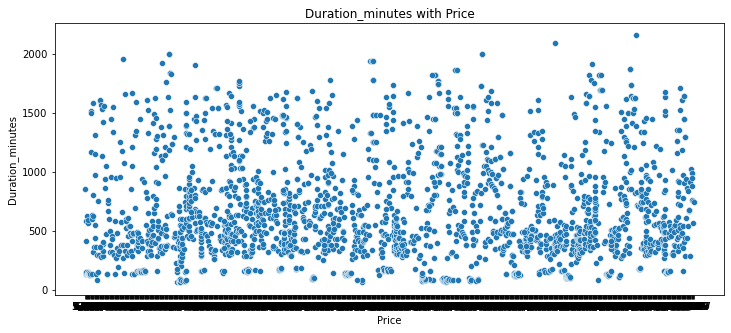

In [18]:
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Price')
        sns.scatterplot(x=df['Price'], y=df[i])
        plt.show()

In [19]:
df.dtypes

FlightName          object
Source              object
Destination         object
TotalStops          object
Price               object
Duration_minutes     int64
dtype: object

In [20]:
df['Price']=df['Price'].str.replace(",","")

<AxesSubplot:xlabel='Price', ylabel='FlightName'>

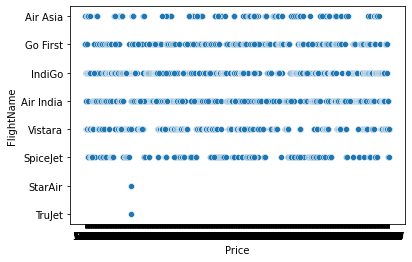

In [21]:
sns.scatterplot(x=df['Price'], y=df['FlightName'])

In [22]:
df['Price'].str.replace(",","")

0        5953
1        5954
2        5954
3        5954
4        5954
        ...  
2320    18409
2321    18409
2322    19777
2323    19879
2324    20717
Name: Price, Length: 2325, dtype: object

In [23]:
df.head()

FlightName     Source Destination TotalStops Price  Duration_minutes
0   Air Asia  New Delhi      Mumbai     1 Stop  5953               855
1   Go First  New Delhi      Mumbai   Non Stop  5954               130
2   Go First  New Delhi      Mumbai   Non Stop  5954               130
3   Go First  New Delhi      Mumbai   Non Stop  5954               130
4   Go First  New Delhi      Mumbai   Non Stop  5954               135

In [24]:
df['FlightName'].value_counts()

IndiGo       643
Vistara      512
Air India    492
Go First     317
SpiceJet     196
Air Asia     163
StarAir        1
TruJet         1
Name: FlightName, dtype: int64

In [25]:
df['FlightName']=df['FlightName'].replace("IndiGo",1)
df['FlightName']=df['FlightName'].replace("Vistara",2)
df['FlightName']=df['FlightName'].replace("Air India",3)
df['FlightName']=df['FlightName'].replace("Go First",4)
df['FlightName']=df['FlightName'].replace("SpiceJet",5)
df['FlightName']=df['FlightName'].replace("Air Asia",6)
df['FlightName']=df['FlightName'].replace("TruJet",7)
df['FlightName']=df['FlightName'].replace("StarAir",8)

In [26]:
df['Source'].value_counts()

New Delhi    727
Bangalore    564
Goa          346
Mumbai       288
Hyderabad    223
Pune         113
Chennai       64
Name: Source, dtype: int64

In [27]:
df['Source']=df['Source'].replace("New Delhi",1)
df['Source']=df['Source'].replace("Bangalore",2)
df['Source']=df['Source'].replace("Goa",3)
df['Source']=df['Source'].replace("Mumbai",4)
df['Source']=df['Source'].replace("Hyderabad",5)
df['Source']=df['Source'].replace("Pune",6)
df['Source']=df['Source'].replace("Chennai",7)

In [28]:
df['Destination'].unique()

array(['Mumbai', 'New Delhi', 'Hyderabad', 'Jaipur', 'Lucknow', 'Kolkata',
       'Chennai', 'Goa', 'Bangalore', 'Pune'], dtype=object)

In [29]:
df['Destination']=df['Destination'].replace("Mumbai",1)
df['Destination']=df['Destination'].replace("New Delhi",2)
df['Destination']=df['Destination'].replace("Hyderabad",3)
df['Destination']=df['Destination'].replace("Jaipur",4)
df['Destination']=df['Destination'].replace("Lucknow",5)
df['Destination']=df['Destination'].replace("Kolkata",6)
df['Destination']=df['Destination'].replace("Chennai",7)
df['Destination']=df['Destination'].replace("Goa",8)
df['Destination']=df['Destination'].replace("Bangalore",9)
df['Destination']=df['Destination'].replace("Pune",10)

In [30]:
df.head()

FlightName  Source  Destination TotalStops Price  Duration_minutes
0           6       1            1     1 Stop  5953               855
1           4       1            1   Non Stop  5954               130
2           4       1            1   Non Stop  5954               130
3           4       1            1   Non Stop  5954               130
4           4       1            1   Non Stop  5954               135

In [31]:
df['TotalStops'].unique()

array(['1 Stop', 'Non Stop', '2 Stop(s)', '3 Stop(s)', '4 Stop(s)'],
      dtype=object)

In [32]:
df['TotalStops']=df['TotalStops'].replace("Non Stop",-1)
df['TotalStops']=df['TotalStops'].replace("1 Stop",1)
df['TotalStops']=df['TotalStops'].replace("2 Stop(s)",2)
df['TotalStops']=df['TotalStops'].replace("3 Stop(s)",3)
df['TotalStops']=df['TotalStops'].replace("4 Stop(s)",4)


In [33]:
df['TotalStops'].unique()

array([ 1, -1,  2,  3,  4], dtype=int64)

In [34]:
df['TotalStops'].value_counts()

 1    1612
-1     370
 2     302
 3      38
 4       3
Name: TotalStops, dtype: int64

In [35]:
##done with encoding all the variables

In [36]:
df['Price']=df['Price'].astype(float)

In [37]:
df.dtypes

FlightName            int64
Source                int64
Destination           int64
TotalStops            int64
Price               float64
Duration_minutes      int64
dtype: object

In [38]:
#CHECKING THE HISTOGRAM WITH ALL COUNTS

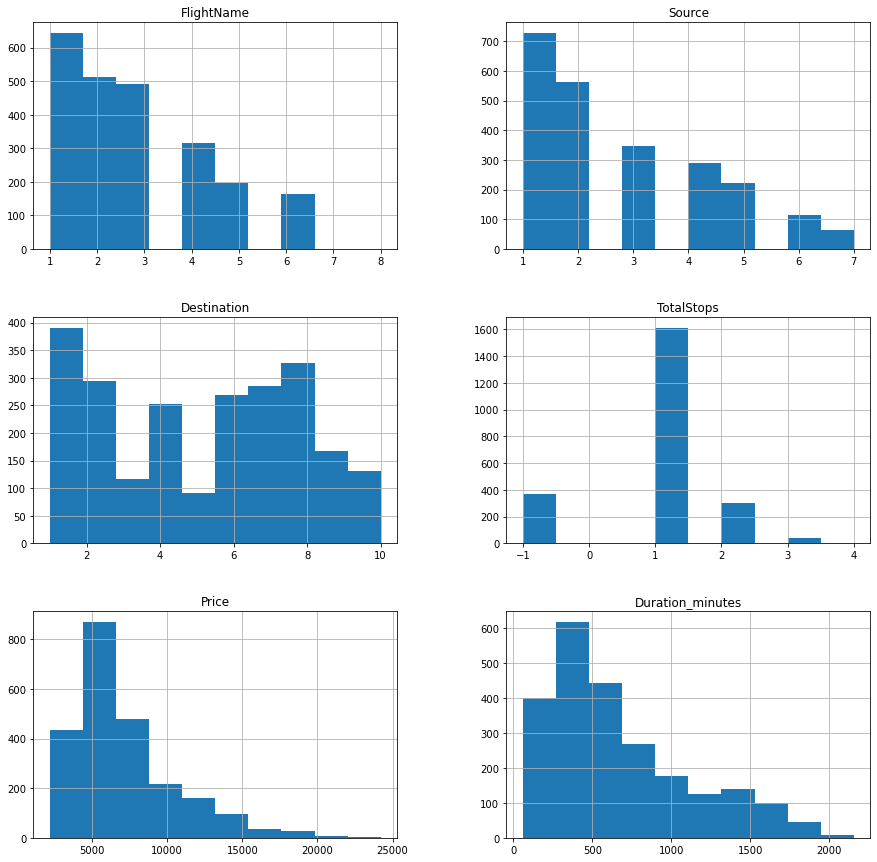

In [39]:
df.hist(figsize=(15,15))
plt.show()

In [40]:
##prices are arond 5000 on an average
##500 minutes is the usual time on flight

In [41]:
##finding outliers and removing them

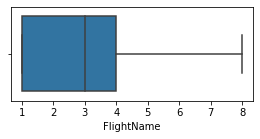

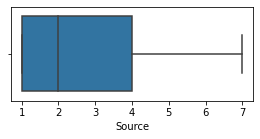

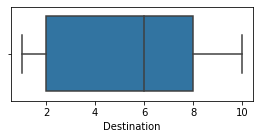

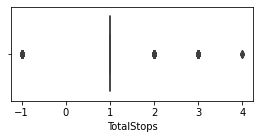

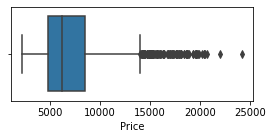

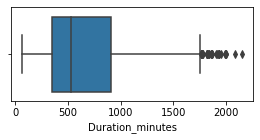

In [42]:
for i in df.columns:
    if df[i].dtypes!='O':
        plt.figure(figsize=(20,10))
        plt.subplot(5,4,3)
        sns.boxplot(df[i])

In [43]:
##outliers are detected in price and duration_minutes

In [44]:
##removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
print("The shape of dataset before removing the outliers is", df.shape)
df2=df[(z<3).all(axis=1)]
print("The shape of dataset after removing the outliers is", df2.shape)

The shape of dataset before removing the outliers is (2325, 6)
The shape of dataset after removing the outliers is (2282, 6)


In [45]:
## 40 outliers data pints are detected and removed

In [46]:
##checking the correlation between features

<AxesSubplot:>

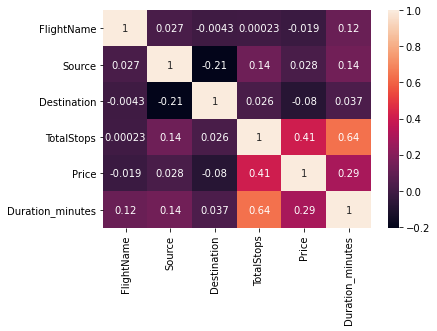

In [47]:
sns.heatmap(df2.corr(),annot=True)

In [48]:
## only total stops is showing good correlation with price i.e target feature

In [49]:
###checking correlation is justifiable with scatterplot

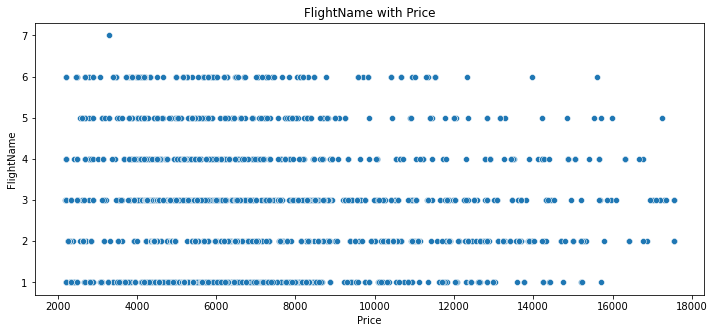

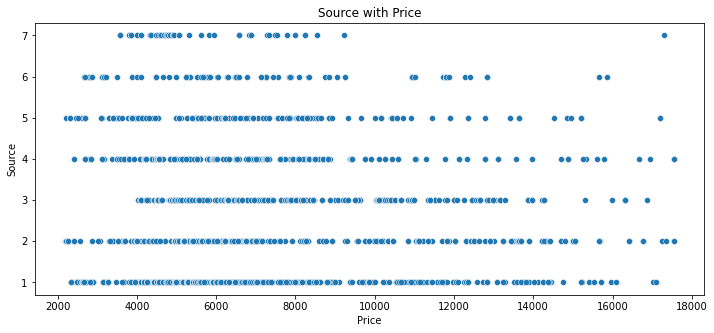

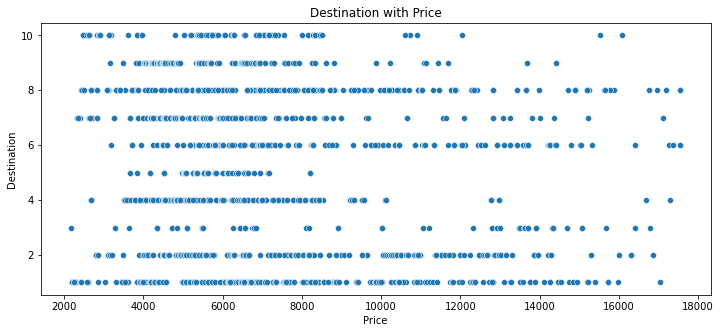

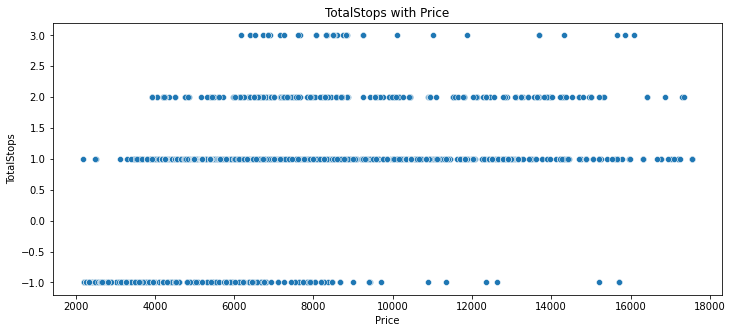

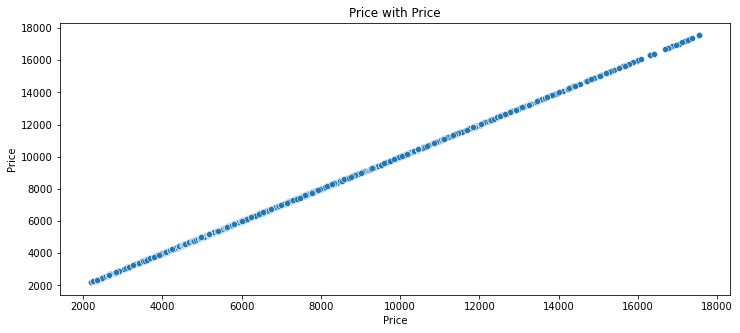

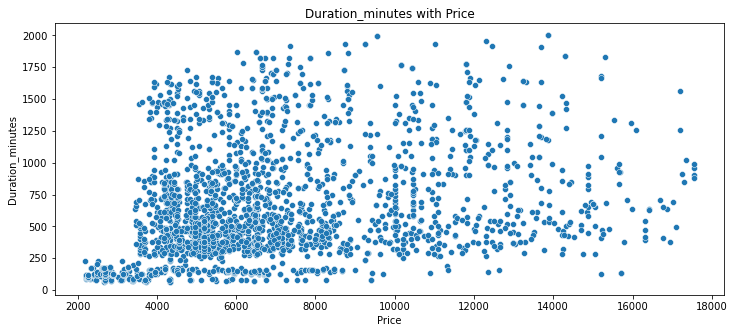

In [50]:
for i in df.columns:
    if df2[i].dtypes!='O':
        plt.figure(figsize=(12,5))
        plt.title(str(i)+' with '+'Price')
        sns.scatterplot(x=df2['Price'], y=df2[i])
        plt.show()

In [51]:
###observing scatterplot we can conclude most of the data are not showing linear relation with price as they are not continuous dataset

In [52]:
##checking the skewness in data

FlightName
0.5845679086376158




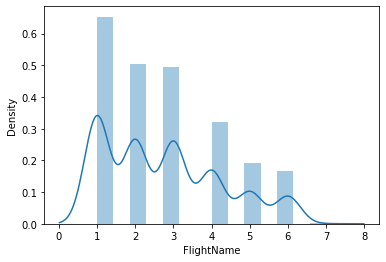

Source
0.8032679751566396




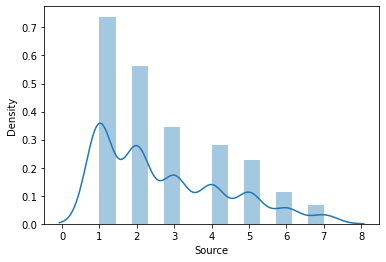

Destination
-0.017369821330352583




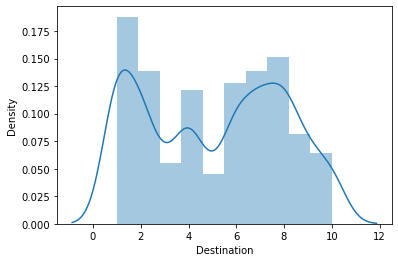

TotalStops
-0.8699597212596054




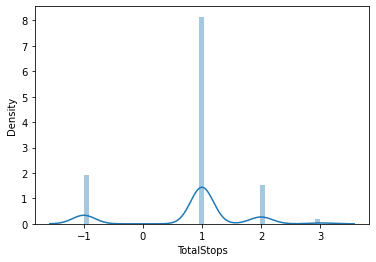

Price
1.0663120422875232




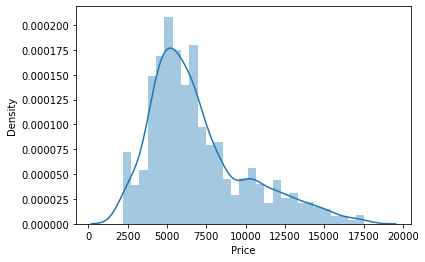

Duration_minutes
0.9114174940373894




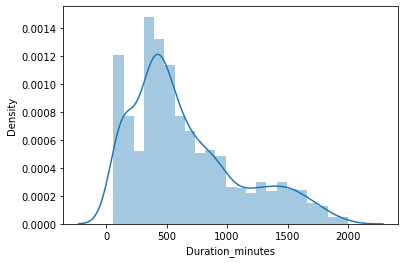

In [53]:
from scipy.stats import skew
for i in df2.columns:
    print(i)
    print(skew(df2[i]))
    print('\n')
    plt.figure()
    sns.distplot(df2[i])
    plt.show()

In [54]:
##only price and duration_minutes are showing slightly right skewed

In [55]:
for i in df2.columns:
    if df2.skew()[i]>0.55:
        df2[i]=np.sqrt(df2[i])

In [56]:
df2.skew()

FlightName          0.199277
Source              0.408933
Destination        -0.017381
TotalStops         -0.870532
Price               0.597178
Duration_minutes    0.284089
dtype: float64

In [57]:
##yes skewness has improved in price and duration features

In [58]:
x=df2.drop(['Price'],axis=1)
y=pd.DataFrame(df2['Price'])
x.shape ,y.shape

((2282, 5), (2282, 1))

In [59]:
##performing stanard scaler transformation for better standardization of features

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

0         1         2         3         4
0  1.838161 -1.136123 -1.397821  0.180335  0.592022
1  0.878327 -1.136123 -1.397821 -2.038131 -1.452429
2  0.878327 -1.136123 -1.397821 -2.038131 -1.452429
3  0.878327 -1.136123 -1.397821 -2.038131 -1.452429
4  0.878327 -1.136123 -1.397821 -2.038131 -1.427536

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

def max_r2_score(reg,x,y):
    max_r2score=0
    for r_state in range(42,101):
        train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(train_x,train_y)
        pred=reg.predict(test_x)
        r2score=r2_score(test_y,pred)
        if r2score>max_r2score:
            max_r2score=r2score
            final_r_state=r_state
    print("The maximum r2 score", max_r2score, "is achieved at r_state", final_r_state)
    return final_r_state

In [62]:
lr=LinearRegression()
max_r2_score(lr,x,y)

The maximum r2 score 0.2721032095949819 is achieved at r_state 90


90

In [63]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=90,test_size=0.20)

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,10)}
gdk=GridSearchCV(kn,parameters)
gdk.fit(train_x,train_y)
gdk.best_params_

{'n_neighbors': 10}

In [65]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
parameters={'criterion':('mse','friedman_mse','mae')}
gdd=GridSearchCV(dt,parameters)
gdd.fit(train_x,train_y)
gdd.best_params_

{'criterion': 'mae'}

In [66]:
from sklearn.svm import SVR
sv=SVR()
parameters={'kernel':('linear','rbf'), 'C':[1,10]}
gdsr=GridSearchCV(sv,parameters)
gdsr.fit(train_x,train_y)
gdsr.best_params_

{'C': 10, 'kernel': 'rbf'}

In [67]:
score=[]
cv=[]
Mean=[]
Root=[]

models=[lr,KNeighborsRegressor(n_neighbors=10),DecisionTreeRegressor(criterion='mae'),SVR(C=10,kernel='rbf')]

for i in models:
    i.fit(train_x,train_y)
    pred=i.predict(test_x)
    r2score=r2_score(test_y,pred)
    score.append(r2score)
    print(i)
    print("")
    print("The r2 score is ", r2score)
    cross=cross_val_score(i,x,y,cv=5,scoring='r2').mean()
    cv.append(cross)
    print("")
    print("The cross validation score is", cross)
    print()
    Meanerror=mean_absolute_error(test_y,pred)
    Mean.append(Meanerror)
    print("The mean absolute error is ", Meanerror)
    rmse=np.sqrt(Meanerror)
    Root.append(rmse)
    print()
    print("The root mean square error is", rmse)
    print()
    print()

LinearRegression()

The r2 score is  0.2721032095949819

The cross validation score is -0.2079230788020281

The mean absolute error is  12.444709698827506

The root mean square error is 3.527706010827363


KNeighborsRegressor(n_neighbors=10)

The r2 score is  0.522940474384414

The cross validation score is -0.4387701783075645

The mean absolute error is  9.237843876362392

The root mean square error is 3.039382153721771


DecisionTreeRegressor(criterion='mae')

The r2 score is  0.4303794759801596

The cross validation score is -0.8903601155773311

The mean absolute error is  8.49146993436168

The root mean square error is 2.914012686033072


SVR(C=10)

The r2 score is  0.42405418935376293

The cross validation score is -0.46672315955395893

The mean absolute error is  9.684980811050853

The root mean square error is 3.1120701809327587




In [68]:
result=pd.DataFrame({'Model':['LinearRegression','KNeighborsRegressor', 'DecisionTreeRegressor', 'SVR'],'R2score':score,'Cross_val_score':cv,'Mean Squared Error':Mean, 'Root Mean Squared Error': Root})
result

Model   R2score  Cross_val_score  Mean Squared Error  \
0       LinearRegression  0.272103        -0.207923           12.444710   
1    KNeighborsRegressor  0.522940        -0.438770            9.237844   
2  DecisionTreeRegressor  0.430379        -0.890360            8.491470   
3                    SVR  0.424054        -0.466723            9.684981   

   Root Mean Squared Error  
0                 3.527706  
1                 3.039382  
2                 2.914013  
3                 3.112070

In [69]:
#KNeighborsRegressor is working fine

In [72]:
#tried using regularization algos

In [73]:
from sklearn.linear_model import Lasso
ls=Lasso()
parameters={'alpha':(0.001,0.01,0.1,1)}
gdls=GridSearchCV(ls,parameters)
gdls.fit(train_x,train_y)
gdls.best_params_

{'alpha': 0.01}

In [74]:
ls=Lasso(alpha=1)
max_r2_score(ls,x,y)

The maximum r2 score 0.2560517954544733 is achieved at r_state 97


97

In [75]:
cvscore=cross_val_score(ls,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.06888787985028648


In [76]:
from sklearn.linear_model import Ridge
rd=Ridge()
parameters={'alpha':(0.001,0.01,0.1,1)}
grd=GridSearchCV(rd,parameters)
grd.fit(train_x,train_y)
grd.best_params_

{'alpha': 1}

In [77]:
rd=Ridge(alpha=1)
max_r2_score(rd,x,y)

The maximum r2 score 0.2720807937298947 is achieved at r_state 90


90

In [79]:
cvscore=cross_val_score(rd,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.2076009622251925


In [80]:
##using ensemble boosting models for better results

In [81]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [83]:
rf=RandomForestRegressor()
parameters={'n_estimators':(50,100,200,500,600)}
gdrf=GridSearchCV(rf,parameters)
gdrf.fit(train_x,train_y)
gdrf.best_params_

{'n_estimators': 500}

In [84]:
rf=RandomForestRegressor(n_estimators=500)
max_r2_score(rf,x,y)

The maximum r2 score 0.6200238727113356 is achieved at r_state 57


57

In [85]:
cvscore=cross_val_score(rf,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.5344002395255265


In [86]:
gb=GradientBoostingRegressor()
parameters={'learning_rate':(0.001,0.01,0.1,1), 'n_estimators':(10,50,100,500)}
gdg=GridSearchCV(gb,parameters)                                                                                                                                        
gdg.fit(train_x,train_y)                                                                                                                                         
gdg.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [87]:
gb=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1)
max_r2_score(gb,x,y)

The maximum r2 score 0.5874183398995377 is achieved at r_state 81


81

In [88]:
cvscore=cross_val_score(gb,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.342689583579996


In [89]:
ad=AdaBoostRegressor()
parameters={'n_estimators':(10,50,100,200,500),'learning_rate':(0.001,0.01,0.1,1)}
gad=GridSearchCV(ad,parameters)
gad.fit(train_x,train_y)
gad.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [91]:
ad=AdaBoostRegressor(n_estimators=500,learning_rate=0.1)
max_r2_score(ad,x,y)

The maximum r2 score 0.3685854453514551 is achieved at r_state 66


66

In [92]:
cvscore=cross_val_score(ad,x,y,cv=5,scoring='r2').mean()
print("The cross validation score is", cvscore)

The cross validation score is -0.24248888959894882


In [94]:
result_boosters=pd.DataFrame({'Boosters':['Lasso','Ridge','RandomForestRegressor','GradientBoostRegressor','AdaBoostRegressor'],'R2 Score':[0.25,0.27,0.62,0.58,0.36],'Cross_val_score':[-0.06,-0.2,-0.5,-0.3,-0.24]})
result_boosters

Boosters  R2 Score  Cross_val_score
0                   Lasso      0.25            -0.06
1                   Ridge      0.27            -0.20
2   RandomForestRegressor      0.62            -0.50
3  GradientBoostRegressor      0.58            -0.30
4       AdaBoostRegressor      0.36            -0.24

In [95]:
##random forest is working fine so saving the model with randomforest regressor

In [96]:
import joblib
joblib.dump(rf,'FlightPricePrediction.csv')

['FlightPricePrediction.csv']

In [97]:
###more data and more features such as wwekdays and weekends can be used to improve the model